In [2]:
#import library
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score

In [3]:
# Dataset
data = pd.read_csv("predic_tabel.csv")

In [24]:
data.head()

,No,Usia,Jenis_Kelamin,Merokok,Bekerja,Rumah_Tangga,Aktivitas_Begadang,Aktivitas_Olahraga,Asuransi,Penyakit_Bawaan,Hasil
0,1,Tua,Pria,Pasif,Tidak,Ya,Ya,Sering,Ada,Tidak,Ya
1,2,Tua,Pria,Aktif,Tidak,Ya,Ya,Jarang,Ada,Ada,Tidak
2,3,Muda,Pria,Aktif,Tidak,Ya,Ya,Jarang,Ada,Tidak,Tidak
3,4,Tua,Pria,Aktif,Ya,Tidak,Tidak,Jarang,Ada,Ada,Tidak
4,5,Muda,Wanita,Pasif,Ya,Tidak,Tidak,Sering,Tidak,Ada,Ya


In [4]:
# Memeriksa nilai kosong/null
print("Missing Values in Each Column:")
print(data.isnull().sum())

Missing Values in Each Column:
No                    0
Usia                  0
Jenis_Kelamin         0
Merokok               0
Bekerja               0
Rumah_Tangga          0
Aktivitas_Begadang    0
Aktivitas_Olahraga    0
Asuransi              0
Penyakit_Bawaan       0
Hasil                 0
dtype: int64


In [5]:
for column in data.columns:
    if data[column].dtype == 'object':
        data[column].fillna(data[column].mode()[0], inplace=True)
    else:
        data[column].fillna(data[column].mean(), inplace=True)

<ipython-input-5-2e69877f5ce7>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(data[column].mean(), inplace=True)
<ipython-input-5-2e69877f5ce7>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

In [7]:
# Menampilkan data
print("\nDataset setelah proses missing value:")
print(data.head())


Dataset setelah proses missing value:
   No  Usia Jenis_Kelamin Merokok Bekerja Rumah_Tangga Aktivitas_Begadang  \
0   1   Tua          Pria   Pasif   Tidak           Ya                 Ya   
1   2   Tua          Pria   Aktif   Tidak           Ya                 Ya   
2   3  Muda          Pria   Aktif   Tidak           Ya                 Ya   
3   4   Tua          Pria   Aktif      Ya        Tidak              Tidak   
4   5  Muda        Wanita   Pasif      Ya        Tidak              Tidak   

  Aktivitas_Olahraga Asuransi Penyakit_Bawaan  Hasil  
0             Sering      Ada           Tidak     Ya  
1             Jarang      Ada             Ada  Tidak  
2             Jarang      Ada           Tidak  Tidak  
3             Jarang      Ada             Ada  Tidak  
4             Sering    Tidak             Ada     Ya  


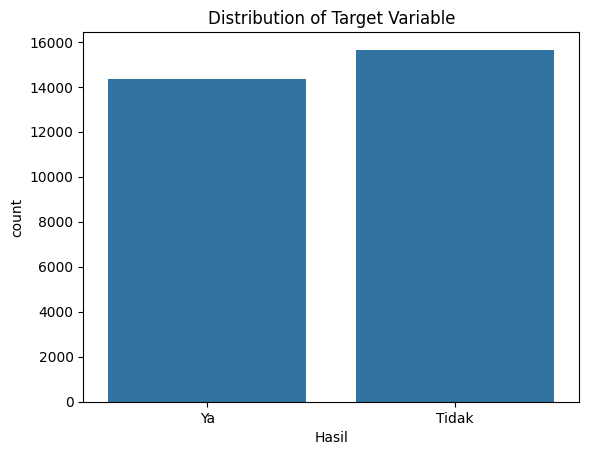

In [9]:
# Exploratory Data Analysis (EDA)
# Visualisasi dari distribusi target variabel
sns.countplot(data=data, x='Hasil')
plt.title('Distribution of Target Variable')
plt.show()

In [10]:
# Memeriksa korelasi anatara nilai numerical features
if data.select_dtypes(include=['number']).shape[1] > 1:
    corr_matrix = data.select_dtypes(include=['number']).corr()
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
    plt.title('Correlation Matrix')
    plt.show()

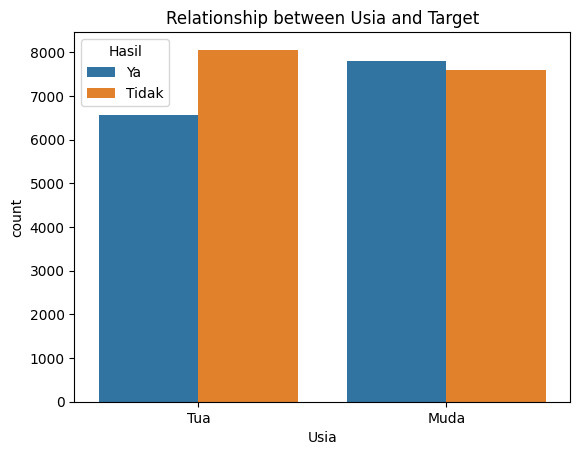

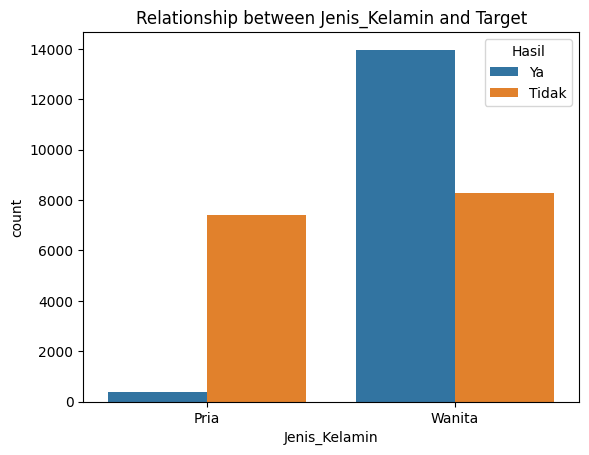

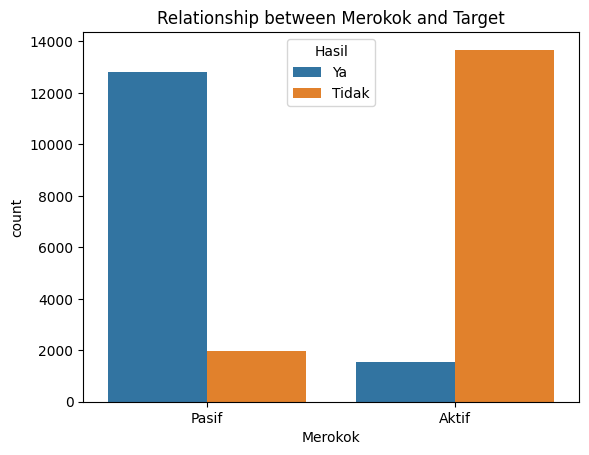

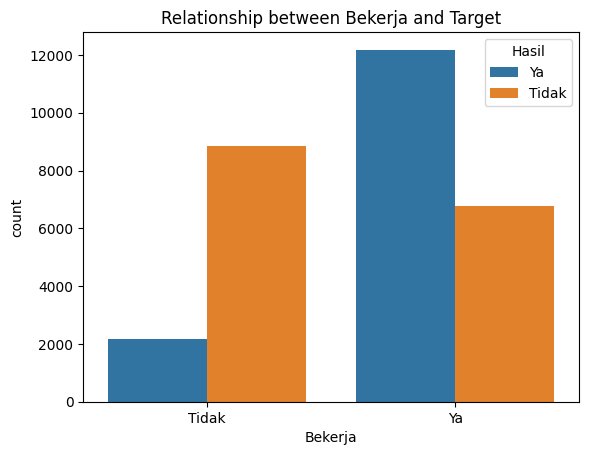

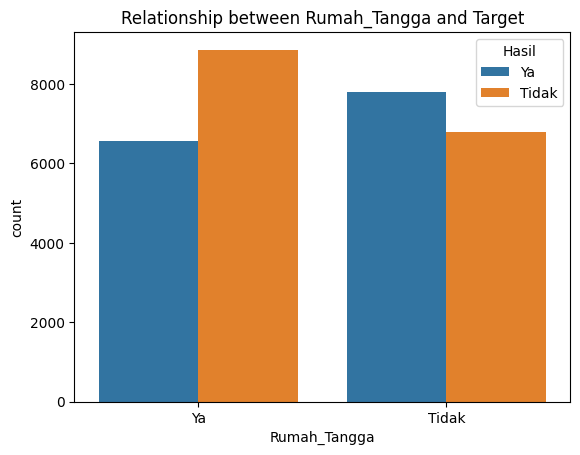

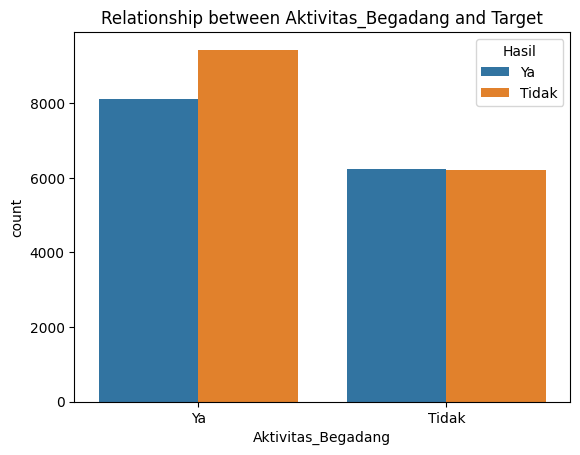

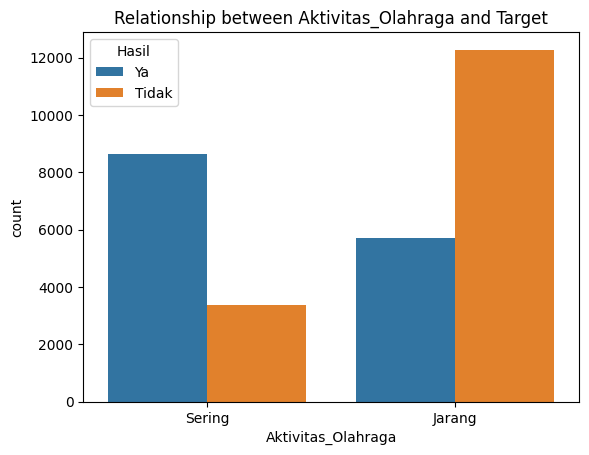

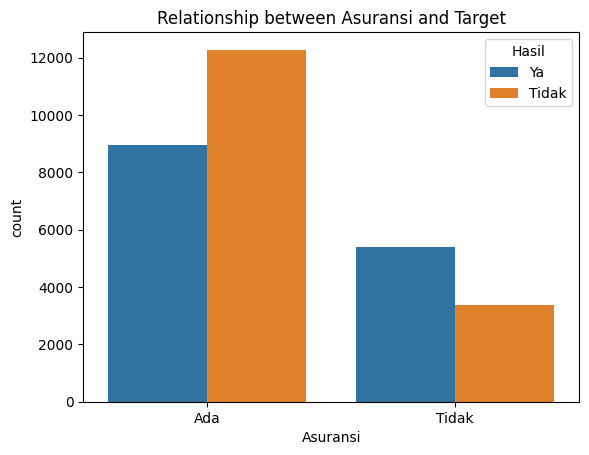

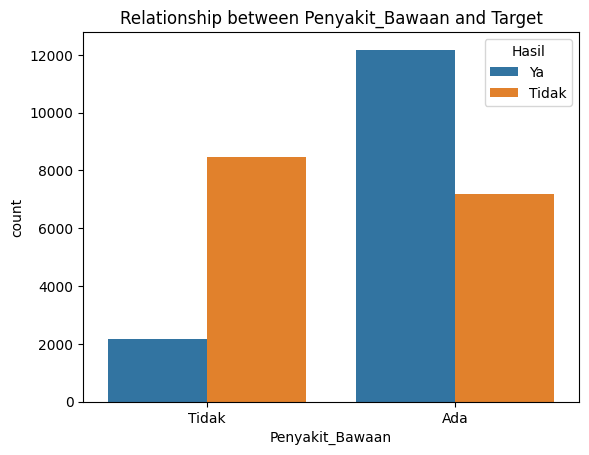

In [11]:
# Memeriksa korelasi antara features dan target variabel
categorical_features = data.select_dtypes(include=['object']).columns
for feature in categorical_features:
    if feature != 'Hasil':
        sns.countplot(data=data, x=feature, hue='Hasil')
        plt.title(f'Relationship between {feature} and Target')
        plt.show()

In [12]:
# Preprocessing: Encode kategori variabel
data_encoded = pd.get_dummies(data.drop(columns=["No"]), drop_first=True)

In [13]:
# Menampilkan dataset setelah encoding
print("\nDataset setelah encoding :")
print(data_encoded.head())


Dataset setelah encoding :
   Usia_Tua  Jenis_Kelamin_Wanita  Merokok_Pasif  Bekerja_Ya  Rumah_Tangga_Ya  \
0      True                 False           True       False             True   
1      True                 False          False       False             True   
2     False                 False          False       False             True   
3      True                 False          False        True            False   
4     False                  True           True        True            False   

   Aktivitas_Begadang_Ya  Aktivitas_Olahraga_Sering  Asuransi_Tidak  \
0                   True                       True           False   
1                   True                      False           False   
2                   True                      False           False   
3                  False                      False           False   
4                  False                       True            True   

   Penyakit_Bawaan_Tidak  Hasil_Ya  
0                   T

In [14]:
# Splitting dataset ke features (X) dan target (y)
X = data_encoded.drop(columns=["Hasil_Ya"])
y = data_encoded["Hasil_Ya"]

In [15]:
# Splitting ke training dan testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [16]:
# Menampilkan size dari training dan testing sets
print(f"\nTraining set size: {X_train.shape}, Testing set size: {X_test.shape}")


Training set size: (24000, 9), Testing set size: (6000, 9)


In [17]:
# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

In [23]:
# Menampilkan hasil Random Forest
print("\nRandom Forest:")
print("Accuracy:", accuracy_score(y_test, rf_predictions))
print("Classification Report:")
print(classification_report(y_test, rf_predictions))


Random Forest:
Accuracy: 0.9433333333333334
Classification Report:
              precision    recall  f1-score   support

       False       0.90      1.00      0.95      3130
        True       1.00      0.88      0.94      2870

    accuracy                           0.94      6000
   macro avg       0.95      0.94      0.94      6000
weighted avg       0.95      0.94      0.94      6000



In [20]:
# Gradient Boosting
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)
gb_predictions = gb_model.predict(X_test)

In [22]:
# Menampilkan hasil Gradient Boosting
print("\nGradient Boosting :")
print("Accuracy:", accuracy_score(y_test, gb_predictions))
print("Classification Report:")
print(classification_report(y_test, gb_predictions))


Gradient Boosting :
Accuracy: 0.9433333333333334
Classification Report:
              precision    recall  f1-score   support

       False       0.90      1.00      0.95      3130
        True       1.00      0.88      0.94      2870

    accuracy                           0.94      6000
   macro avg       0.95      0.94      0.94      6000
weighted avg       0.95      0.94      0.94      6000

